# 모듈 임포트하기

In [1]:
import pymc3 as mc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# 모델 정의

In [2]:
mu = 4.0
sigma = 2.0
model = mc.Model()

with model:
    mc.Normal('X', mu, tau=1/sigma**2)
    
model.vars

[X ~ Normal]

In [3]:
start = dict(X=2)
with model:
    step = mc.Metropolis()
    trace = mc.sample(10000, start=start, step=step)

C:\Users\dcd\AppData\Local\Temp\ipykernel_5456\3152925301.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = mc.sample(10000, start=start, step=step)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [X]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 63 seconds.
The number of effective samples is smaller than 25% for some parameters.


C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability distribution')

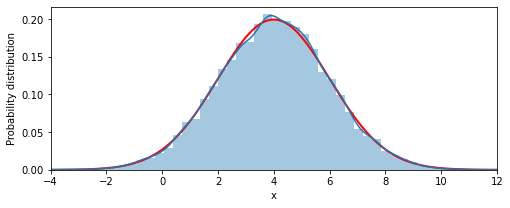

In [4]:
X = trace.get_values("X")

x = np.linspace(-4, 12, 1000)
y = stats.norm(mu, sigma).pdf(x)

fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(x, y, 'r', lw=2)
sns.distplot(X, ax=ax)
ax.set_xlim(-4, 12)
ax.set_xlabel("x")
ax.set_ylabel("Probability distribution")

C:\Users\dcd\AppData\Local\Temp\ipykernel_5456\3603260394.py:4: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  mc.traceplot(trace)
C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'X'}>]], dtype=object)

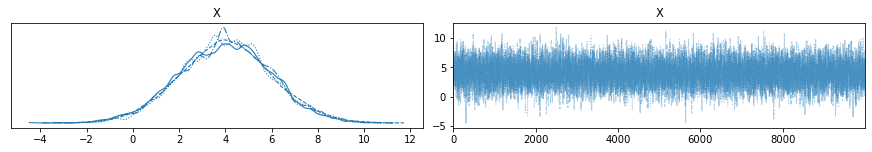

In [6]:
# fig, axes = plt.subplots(1, 2, figsize=(8, 2.5), squeeze=False)
# mc.traceplot(trace, ax=axes)
# axes[0, 0].plot(x, y, 'r', lw=0.5)
mc.traceplot(trace)

In [7]:
model = mc.Model()

with model:
    mean = mc.Normal('mean', 3.0)
    sigma = mc.HalfNormal('sigma', sd=1.0)
    X = mc.Normal('X', mean, tau=sigma)
    
model.vars

[mean ~ Normal, sigma_log__ ~ TransformedDistribution, X ~ Normal]

In [8]:
with model:
    start = mc.find_MAP()
    
start

C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


{'mean': array(3.),
 'sigma_log__': array(-0.34657365),
 'X': array(3.),
 'sigma': array(0.70710674)}

In [9]:
with model:
    step = mc.Metropolis()
    trace = mc.sample(10000, start=start, step=step)

C:\Users\dcd\AppData\Local\Temp\ipykernel_5456\3351488652.py:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = mc.sample(10000, start=start, step=step)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [X]
>Metropolis: [sigma]
>Metropolis: [mean]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 85 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [10]:
print("sigma 변수에 대한 표본 trace 평균: ", trace.get_values('sigma').mean())

X = trace.get_values('X')
print("X의 표본 평균: ", X.mean())

print("X의 표본 표준편차: ", trace.get_values('X').std())

sigma 변수에 대한 표본 trace 평균:  0.7982806374356114
X의 표본 평균:  3.051944035892201
X의 표본 표준편차:  2.916797621581404


C:\Users\dcd\AppData\Local\Temp\ipykernel_5456\1477173987.py:3: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  mc.traceplot(trace)
C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mean'}>,
        <AxesSubplot:title={'center':'mean'}>],
       [<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'X'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

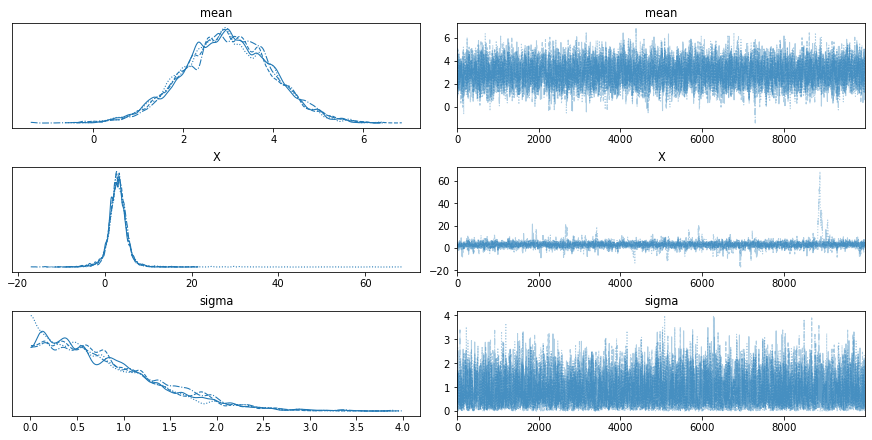

In [11]:
# fig, axes = plt.subplots(3, 2, figsize=(8, 6), squeeze=False)
# mc.traceplot(trace, varnames=['mean', 'sigma', 'X'], ax=axes)
mc.traceplot(trace)

## 사후 분포 표본 추출

In [12]:
mu = 2.5
s = 1.5
data = stats.norm(mu, s).rvs(100)

with mc.Model() as model:    
    mean = mc.Normal('mean', 4.0, tau=1.0) # true 2.5
    sigma = mc.HalfNormal('sigma', tau=3.0 * np.sqrt(np.pi/2)) # true 1.5
    X = mc.Normal('X', mean, 1/sigma**2, observed=data)
    
model.vars

[mean ~ Normal, sigma_log__ ~ TransformedDistribution]

In [13]:
with model:
    start = mc.find_MAP()
    step = mc.Metropolis()
    trace = mc.sample(10000, start=start, step=step)

C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


C:\Users\dcd\AppData\Local\Temp\ipykernel_5456\1735759783.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = mc.sample(10000, start=start, step=step)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [mean]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 376 seconds.
The number of effective samples is smaller than 25% for some parameters.


C:\Users\dcd\AppData\Local\Temp\ipykernel_5456\3226503034.py:5: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  mc.traceplot(trace)
C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mc.find_MAP:  {'mean': array(2.40744969), 'sigma_log__': array(-0.16888008), 'sigma': array(0.84461018)}


array([[<AxesSubplot:title={'center':'mean'}>,
        <AxesSubplot:title={'center':'mean'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

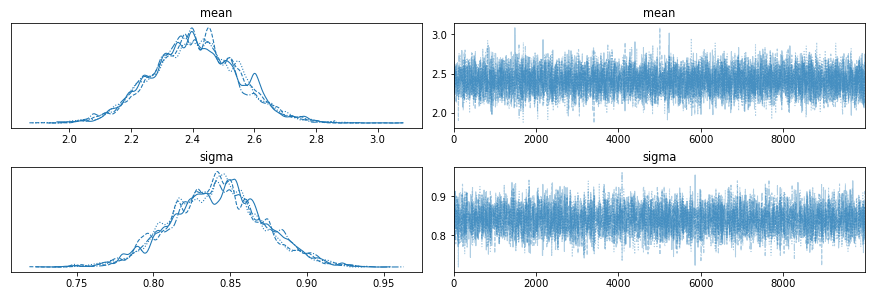

In [14]:
print("mc.find_MAP: ", start)

# fig, axes = plt.subplots(2, 2, figsize=(8, 4), squeeze=False)
# mc.traceplot(trace, varnames=['mean', 'sigma'], ax=axes)
mc.traceplot(trace)

평균, mean 변수에 대한 표본 trace의 평균:  2.5 2.407348152984121
표준편차, sigma 변수에 대한 표본 trace의 평균:  1.5 0.84166604925389


C:\Users\dcd\AppData\Local\Temp\ipykernel_5456\3723479508.py:5: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  mc.forestplot(trace)
C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

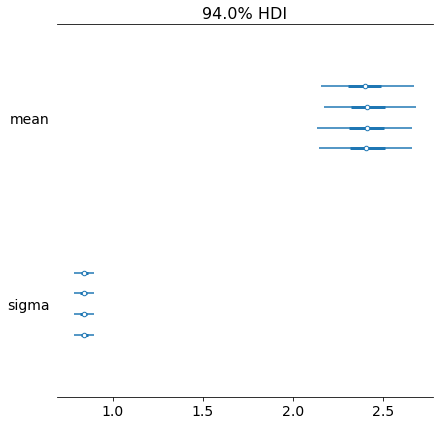

In [16]:
print("평균, mean 변수에 대한 표본 trace의 평균: ", mu, trace.get_values('mean').mean())
print("표준편차, sigma 변수에 대한 표본 trace의 평균: ", s, trace.get_values('sigma').mean())

# mc.forestplot(trace, varnames=['mean', 'sigma'])
mc.forestplot(trace)

In [18]:
# mc.summary(trace, varnames=['mean', 'sigma'])
mc.summary(trace)

C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mean,2.407,0.14,2.150,2.670,0.002,0.001,6600.0,7120.0,1.0
sigma,0.842,0.03,0.785,0.897,0.000,0.000,4878.0,5237.0,1.0


## 선형 회귀

In [19]:
dataset = sm.datasets.get_rdataset("Davis", "carData")

data = dataset.data[dataset.data.sex == 'M']
data = data[data.weight < 110]

data.head(3)

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
3,M,68,177,70.0,175.0
5,M,76,170,76.0,165.0


Text(0, 0.5, 'height')

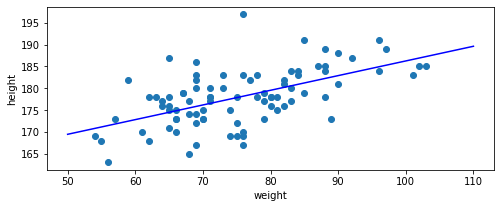

In [20]:
model = smf.ols("height ~ weight", data=data)
result = model.fit()

x = np.linspace(50, 110, 25)
y = result.predict({"weight": x})

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(data.weight, data.height, 'o')
ax.plot(x, y, color="blue")
ax.set_xlabel("weight")
ax.set_ylabel("height")

In [21]:
with mc.Model() as model:
    sigma = mc.Uniform('sigma', 0, 10)
    intercept = mc.Normal('intercept', 125, sd=30)
    beta = mc.Normal('beta', 0, sd=5)    
    height_mu = intercept + beta * data.weight

    mc.Normal('height', mu=height_mu, sd=sigma, observed=data.height)
    predict_height = mc.Normal('predict_height', mu=intercept + beta * x, sd=sigma, shape=len(x)) 
    
model.vars

[sigma_interval__ ~ TransformedDistribution,
 intercept ~ Normal,
 beta ~ Normal,
 predict_height ~ Normal]

In [22]:
with model:
    start = mc.find_MAP()
    step = mc.NUTS()
    trace = mc.sample(10000, step, start=start)

C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\pymc3\distributions\transforms.py:294: RuntimeWarning: divide by zero encountered in log
  return floatX(np.log(x - a) - np.log(b - x))
C:\Users\dcd\AppData\Local\Temp\ipykernel_5456\2779263318.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = mc.sample(10000, step, start=start)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [predict_height, beta, intercept, sigma]
C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\pymc3\distributions\transforms.py:294: RuntimeWarning: divide by zero encountered in log
  return floatX(np.log(x - a) - np.log(b - x))


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 15476 seconds.
There were 600 divergences after tuning. Increase `target_accept` or reparameterize.
There were 30 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.


C:\Users\dcd\AppData\Local\Temp\ipykernel_5456\127438890.py:3: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  mc.traceplot(trace)
C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'predict_height'}>,
        <AxesSubplot:title={'center':'predict_height'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

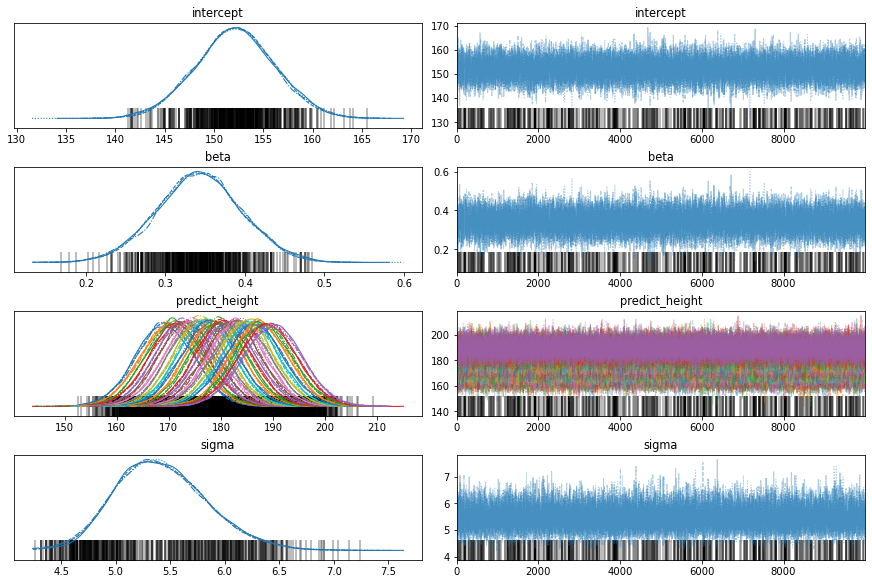

In [23]:
# fig, axes = plt.subplots(2, 2, figsize=(8, 4), squeeze=False)
# mc.traceplot(trace, varnames=['intercept', 'beta'], ax=axes)
mc.traceplot(trace)

In [25]:
intercept = trace.get_values("intercept").mean()
print("intercept: ", intercept)

beta = trace.get_values("beta").mean()
print("beta: ", beta)

print("result.params: ", result.params)

result.predict({"weight": 90})

weight_index = np.where(x == 90)[0][0]
print("predict_height 변수에 대한 표본 trace 평균: ", trace.get_values("predict_height")[:, weight_index].mean())

intercept:  152.15396838767947
beta:  0.34253025155996075
result.params:  Intercept    152.617348
weight         0.336477
dtype: float64
predict_height 변수에 대한 표본 trace 평균:  182.98702122068377


C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability distribution')

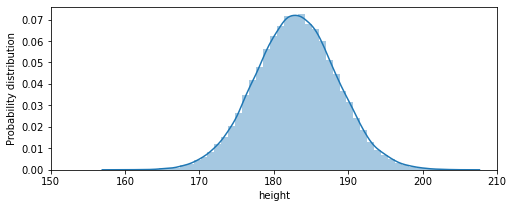

In [26]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.distplot(trace.get_values("predict_height")[:, weight_index], ax=ax)

ax.set_xlim(150, 210)
ax.set_xlabel("height")
ax.set_ylabel("Probability distribution")

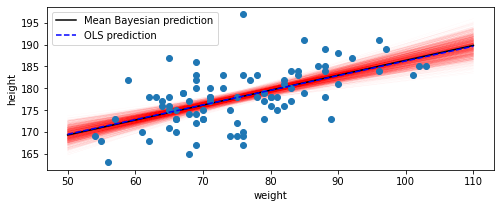

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

for n in range(500, 2000, 1):
    intercept = trace.get_values("intercept")[n]
    beta = trace.get_values("beta")[n]
    ax.plot(x, intercept + beta * x, color='red', lw=0.25, alpha=0.05)

intercept = trace.get_values("intercept").mean()
beta = trace.get_values("beta").mean()

ax.plot(x, intercept + beta * x, color='k', label="Mean Bayesian prediction")
ax.plot(data.weight, data.height, 'o')
ax.plot(x, y, '--', color="blue", label="OLS prediction")

ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.legend(loc=0)

In [28]:
with mc.Model() as model:
    mc.glm.GLM.from_formula('height ~ weight', data)
    step = mc.NUTS()
    trace = mc.sample(2000, step)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\dcd\AppData\Local\Temp\ipykernel_5456\3366608755.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = mc.sample(2000, step)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, weight, Intercept]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1259 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


C:\Users\dcd\AppData\Local\Temp\ipykernel_5456\2122156396.py:3: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  mc.traceplot(trace)
C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

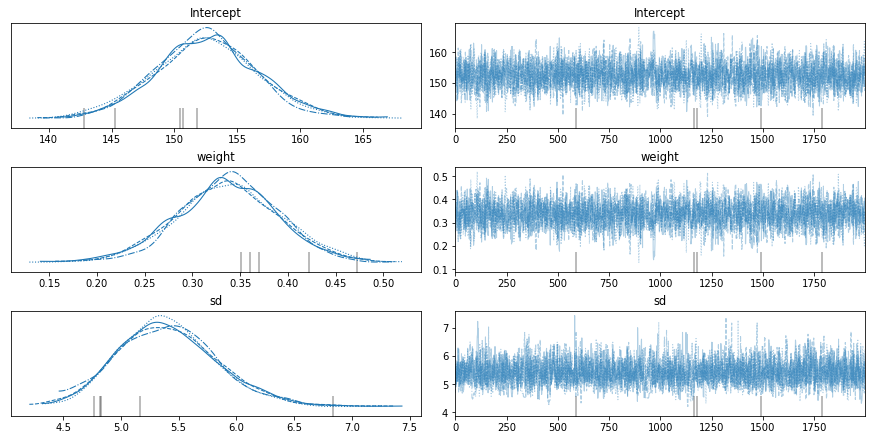

In [29]:
# fig, axes = plt.subplots(3, 2, figsize=(8, 6), squeeze=False)
# mc.traceplot(trace, varnames=['Intercept', 'weight', 'sd'], ax=axes)
mc.traceplot(trace)

In [30]:
data = dataset.data.copy()
data = data[data.weight < 110]
data["sex"] = data["sex"].apply(lambda x: 1 if x == "F" else 0)

with mc.Model() as model:
    intercept_mu, intercept_sigma = 125, 30
    beta_mu, beta_sigma = 0, 5
    
    intercept = mc.Normal('intercept', intercept_mu, sd=intercept_sigma, shape=2)
    beta = mc.Normal('beta', beta_mu, sd=beta_sigma, shape=2)
    error = mc.Uniform('error', 0, 10)

    sex_idx = data.sex.values
    height_mu = intercept[sex_idx] + beta[sex_idx] * data.weight

    mc.Normal('height', mu=height_mu, sd=error, observed=data.height)
    
model.vars

[intercept ~ Normal, beta ~ Normal, error_interval__ ~ TransformedDistribution]

In [31]:
with model:
    start = mc.find_MAP()
    step = mc.NUTS()
    trace = mc.sample(5000, step, start=start)

C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


C:\Users\dcd\AppData\Local\Temp\ipykernel_5456\3945459653.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = mc.sample(5000, step, start=start)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [error, beta, intercept]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 11452 seconds.


C:\Users\dcd\AppData\Local\Temp\ipykernel_5456\3626166637.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  mc.traceplot(trace, figsize=(8, 6))
C:\Users\dcd\anaconda3\envs\py38\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'error'}>,
        <AxesSubplot:title={'center':'error'}>]], dtype=object)

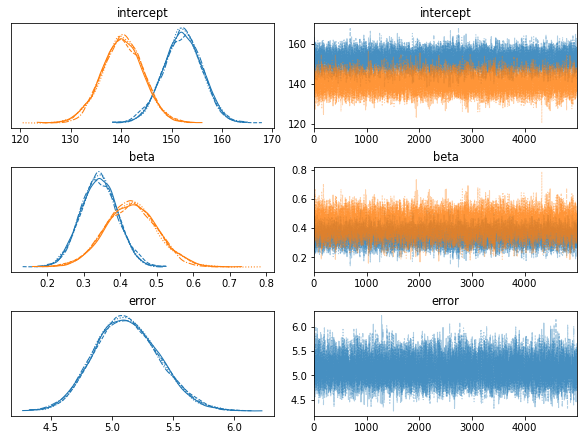

In [32]:
mc.traceplot(trace, figsize=(8, 6))

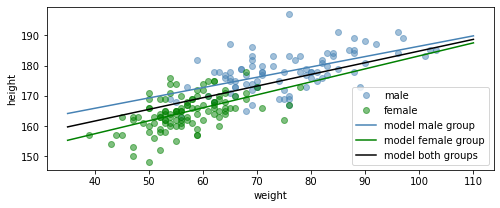

In [33]:
intercept_m, intercept_f = trace.get_values('intercept').mean(axis=0)
beta_m, beta_f = trace.get_values('beta').mean(axis=0)

intercept = trace.get_values('intercept').mean()
beta = trace.get_values('beta').mean()


fig, ax = plt.subplots(1, 1, figsize=(8, 3))

mask_m = data.sex == 0
mask_f = data.sex == 1

ax.plot(data.weight[mask_m], data.height[mask_m], 'o', color="steelblue", label="male", alpha=0.5)
ax.plot(data.weight[mask_f], data.height[mask_f], 'o', color="green", label="female", alpha=0.5)

x = np.linspace(35, 110, 50)
ax.plot(x, intercept_m + x * beta_m, color="steelblue", label="model male group")
ax.plot(x, intercept_f + x * beta_f, color="green", label="model female group")
ax.plot(x, intercept + x * beta, color="black", label="model both groups")

ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.legend(loc=0)